# Random Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

## Classification (Iris dataset)

Random Forest Classifier Accuracy: 1.0
OOB Score: 0.9428571428571428

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



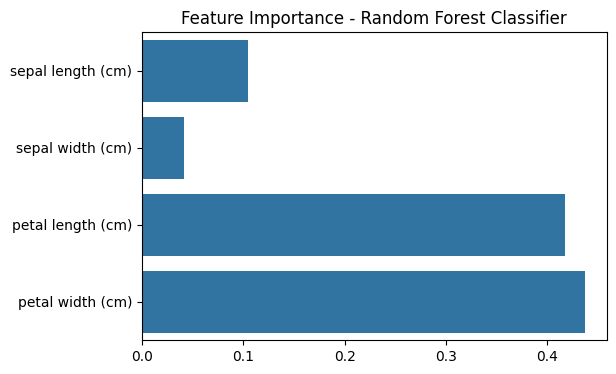

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, oob_score=True)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", rf_clf.oob_score_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(6,4))
sns.barplot(x=rf_clf.feature_importances_, y=iris.feature_names)
plt.title("Feature Importance - Random Forest Classifier")
plt.show()


## Hyperparameter Tuning (GridSearch)


In [3]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "max_features": ["sqrt", "log2", None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from GridSearch:", grid_search.best_score_)


Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
Best Accuracy from GridSearch: 0.9523809523809524


## Regression (California Housing dataset)

In [4]:
housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, oob_score=True, bootstrap=True)
rf_reg.fit(X_train_h, y_train_h)

y_pred_h = rf_reg.predict(X_test_h)
mse = mean_squared_error(y_test_h, y_pred_h)
print("Random Forest Regressor MSE:", mse)
print("OOB Score (Regressor):", rf_reg.oob_score_)

Random Forest Regressor MSE: 0.29649278336294826
OOB Score (Regressor): 0.7831247459890989


## Feature Importance for Regression

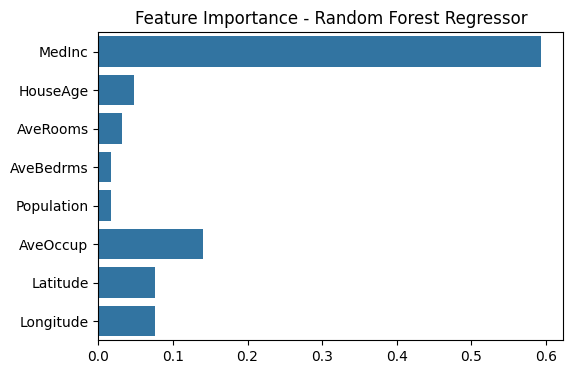

In [5]:
plt.figure(figsize=(6,4))
sns.barplot(x=rf_reg.feature_importances_, y=housing.feature_names)
plt.title("Feature Importance - Random Forest Regressor")
plt.show()

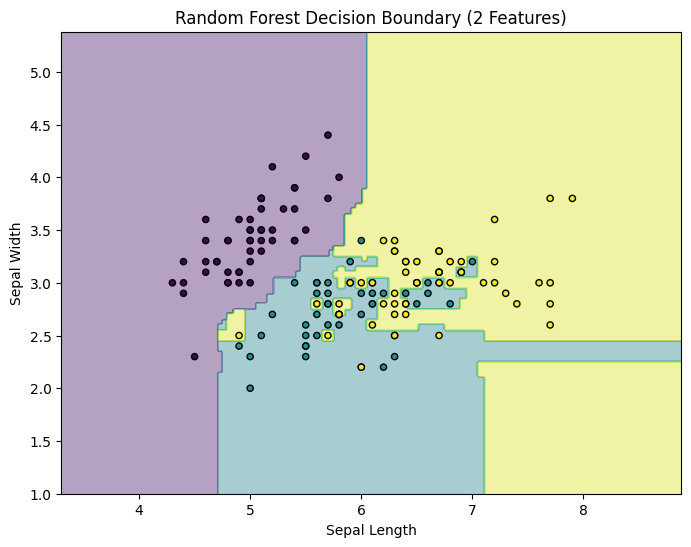

In [7]:
X_vis = iris.data[:, :2]   
y_vis = iris.target

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.3, random_state=42
)

clf_vis = RandomForestClassifier(n_estimators=100, random_state=42)
clf_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor="k", s=20)
plt.title("Random Forest Decision Boundary (2 Features)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()